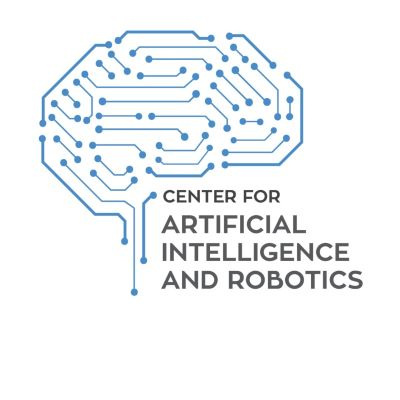

# Practice 4

Alright, now that we've learned both regular neural networks and convolutional neural networks, we want to go ahead and train a few networks to see what kind of results we get.

# CIFAR Dataset

# üì¶ What's the Difference Between CIFAR-10 and CIFAR-100?

Both **CIFAR-10** and **CIFAR-100** are image classification datasets made up of 32√ó32 color images, but they differ in terms of class granularity and complexity.

---

## üîç Key Differences

| Feature | **CIFAR-10** | **CIFAR-100** |
|--------|--------------|----------------|
| üìö Number of Classes | 10 | 100 |
| üñºÔ∏è Images per Class | 6,000 | 600 |
| üß† Total Training Images | 50,000 | 50,000 |
| üß™ Test Images | 10,000 | 10,000 |
| üìè Image Size | 32√ó32 pixels (RGB) | 32√ó32 pixels (RGB) |
| üß± Label Structure | Flat (single level) | Hierarchical (fine + coarse labels) |
| üî† Example Classes | airplane, dog, frog, truck... | tulip, maple_tree, baby, pickup_truck... |

---

## üí° Which One to Use?

- ‚úÖ **Use CIFAR-10** if you're:
  - Just getting started with image classification
  - Testing simple or baseline models

- ‚úÖ **Use CIFAR-100** if you're:
  - Exploring more challenging, fine-grained tasks
  - Interested in hierarchical or multi-task classification

---

CIFAR-10 is great for beginners and prototyping.  
CIFAR-100 offers a more realistic challenge for testing model robustness.


# Importing Dataset, Packages, and and Overview on the Dataset  

Using the commands and datasets available in Keras, we first load the CIFAR-10 dataset.

We then also import the necessary libraries as well.

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import cv2

In [2]:
import matplotlib.pyplot as plt

## Loading Train and Test sets with their Labels

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

We print the overall shape of our dataset to see how many training and test images we have, and also to check what the shape of our labels looks like.

In [4]:
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [6]:
x_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
y_train[0]

array([6], dtype=uint8)

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Using Matplotlib, we display a few images from our dataset to get a general idea of what the dataset contains.

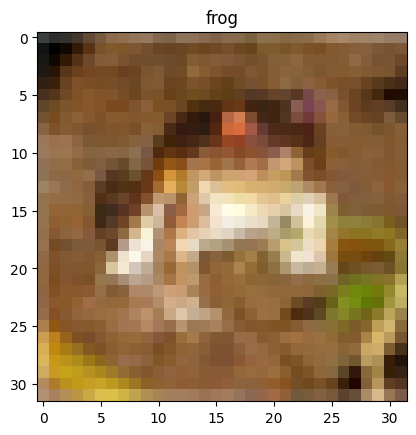

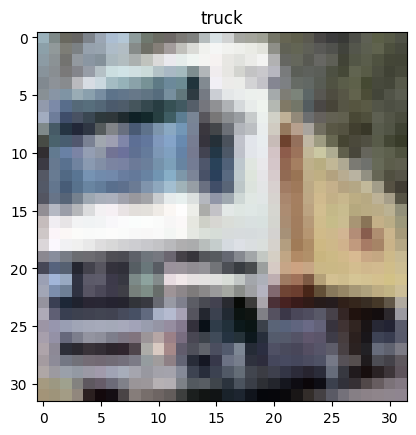

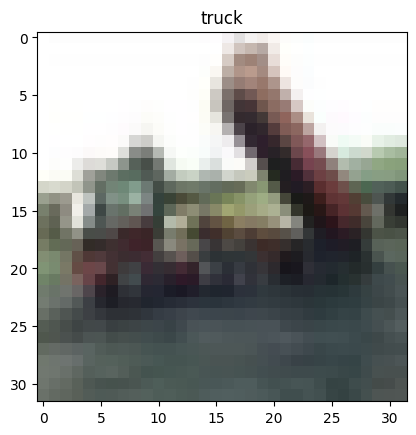

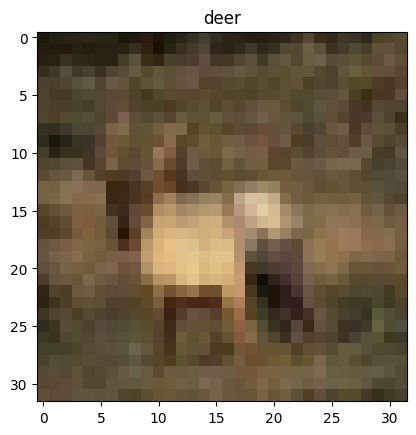

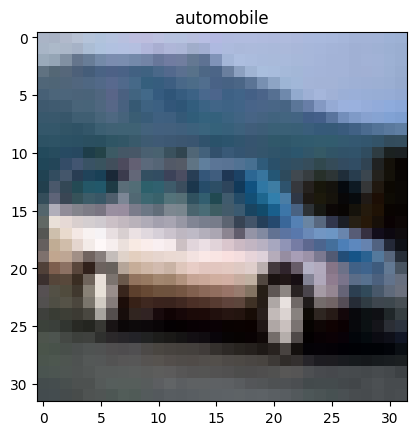

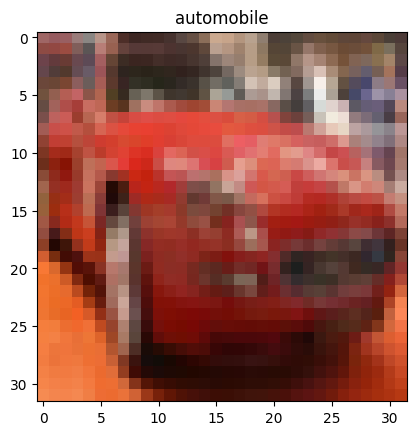

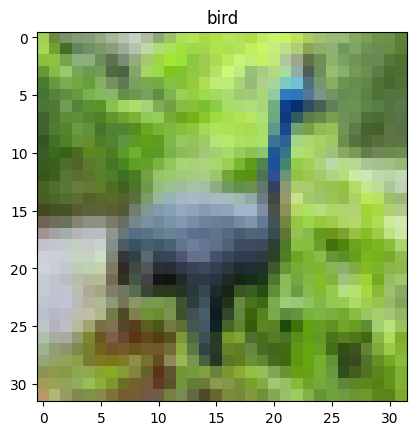

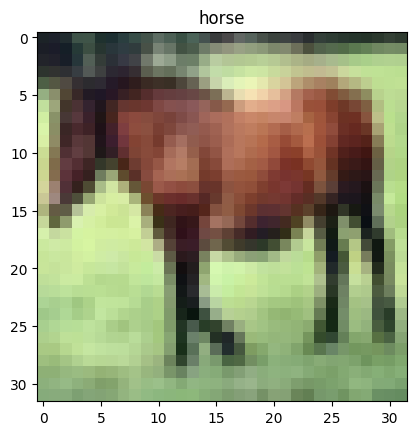

In [11]:
for i in range(10):
    plt.imshow(x_train[i])       # Show the third image
    plt.title(class_names[int(y_train[i])])
    plt.show()

# ANN

At this stage, we want to fit an ANN on the CIFAR dataset images. But before that, we need to do a few things on the data first!

At this stage, we want to fit an ANN on the CIFAR dataset images. But before that, we need to do a few things on the data! And after that, they need to be in a format that can be fed into the ANN as input.

### ‚ö†Ô∏è Important Reminder: Don't Forget the 3 Color Channels!

When working with CIFAR-10 images:

- Each image has the shape **(32, 32, 3)** ‚Üí height, width, and 3 **color channels** (RGB)
- If you're flattening the images to feed them into a fully connected ANN, make sure to include **all 3 channels**

In [7]:
x_train.shape[0]

50000

In [11]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)

In [12]:
x_train_flat.dtype  # dtype('uint8')

dtype('uint8')

In [13]:
x_train_final = x_train.reshape(x_train.shape[0], -1) / 255
x_test_final = x_test.reshape(x_test.shape[0], -1) / 255

In [15]:
x_train_final.dtype

dtype('float64')

### üõ†Ô∏è Image Preprocessing Explained: Reshaping, Normalization, and Data Type

Before feeding image data into a fully connected Artificial Neural Network (ANN), we need to prepare it properly. Here's why we apply the following steps:

---

#### üîÑ 1. **Why do we reshape the images?**

Original image shape from CIFAR-10: (32, 32, 3) ‚Üí height, width, RGB channels


- Neural networks using dense (fully connected) layers expect **1D input vectors**, not 3D images.
- So we reshape each image to a **flat vector**: 32 √ó 32 √ó 3 = 3072

‚úÖ Final reshaped training set shape: (50000, 3072)

---

#### üé® 2. **Why do we divide by 255? (Normalization)**

Pixel values in image data range from **0 to 255** (uint8).

- Dividing by 255 scales them to the range **[0.0, 1.0]**
- This makes training **faster, more stable, and more accurate**
- Neural networks generally perform better when inputs are **small, centered, and normalized**

---

#### üî¢ 3. **Why use `.astype("float32")`?**

By default, dividing an integer array by an integer (like `/ 255`) in NumPy **converts the result to float64**. While this works, it's not ideal for deep learning:

| Reason | Why it matters |
|--------|----------------|
| ‚úÖ ML Frameworks Expect It | Libraries like TensorFlow and PyTorch use `float32` by default |
| ‚ö° More Efficient on GPU | `float32` uses less memory and computes faster than `float64` |
| üìè Lower Memory Usage | Saves half the memory compared to `float64` |
| üß† Consistency | Ensures compatibility and avoids subtle bugs later |

---

### ‚úÖ Final Code

```python
x_train_final = x_train.reshape((x_train.shape[0], -1)).astype("float32") / 255.0
x_test_final = x_test.reshape((x_test.shape[0], -1)).astype("float32") / 255.0

##### To make sure our data is in the format we want, we print their shapes.

In [16]:
print("Training images shape:", x_train_final.shape)
print("Training labels shape:", x_test_final.shape)

Training images shape: (50000, 3072)
Training labels shape: (10000, 3072)


Now, the label format needs to match the format of our network's output ‚Äî meaning it should have 10 values.
So, using the to_categorical function from Keras, we create the desired labels.

In [19]:
y_train.max()

9

In [ ]:
from keras.utils import to_categorical
y_train_cat = #Your Code Here
y_test_cat = #Your Code Here

<div dir="auto">
ÿ≠ÿßŸÑÿß ÿ®ÿß€åÿØ ŸÖÿØŸÑÿ™ŸàŸÜ ÿ±Ÿà ÿ®ÿ≥ÿßÿ≤€åÿØ
ÿßŸàŸÑ ÿßÿ≤ ŸáŸÖŸá ÿßŸàŸÜ ⁄©ŸÑÿßÿ≥ Ÿáÿß Ÿà ÿ™Ÿàÿßÿ®ÿπ Ÿà ŸÑÿß€åŸá Ÿáÿß€å€å ⁄©Ÿá ŸÜ€åÿßÿ≤ ÿØÿßÿ±€åÿØ ÿ±Ÿà ÿß€åŸÖŸæŸàÿ±ÿ™ ⁄©ŸÜ€åÿØ

In [ ]:
from keras.model import #Your Code Here???
from keras.layers import #Your Code Here???

<div dir="auto">
ÿ≠ÿßŸÑÿß ŸÖÿØŸÑÿ™ŸàŸÜ ÿ±Ÿà ÿ®ÿ≥ÿßÿ≤€åÿØ

    1. ŸÖÿØŸÑÿ™ŸàŸÜ ÿ±Ÿà ÿ®Ÿá ÿµŸàÿ±ÿ™ Sequential ÿ®ÿ≥ÿßÿ≤€åÿØ
    2. ŸÑÿß€åŸá €å ÿßŸàŸÑ€åŸá ÿ±Ÿà ŸÑÿß€åŸá €å Input ŸÇÿ±ÿßÿ± ÿ®ÿØ€åÿØ Ÿà ÿ¥⁄©ŸÑ Ÿàÿ±ŸàÿØ€å ÿ±Ÿà ÿ®ÿ±ÿßÿ¥ ŸÖÿ¥ÿÆÿµ ⁄©ŸÜ€åÿØ
    3. ÿ®ÿπÿØ ŸÑÿß€åŸá Ÿáÿß€å Dense ÿ®Ÿá ÿ®Ÿá ÿ™ÿ±ÿ™€åÿ® ÿ®ÿß ÿ™ÿπÿØÿßÿØ ŸÜŸàÿØ Ÿáÿß€å 512Ÿà512Ÿà1024Ÿà10 ŸÇÿ±ÿßÿ± ÿ®ÿØ€åÿØ Ÿà ÿß⁄©ÿ™€åŸà€åÿ¥ŸÜ Ÿáÿß€å ŸÖŸÜÿßÿ≥ÿ® ÿ±Ÿà ÿ®ÿ±ÿß€å Ÿáÿ± ⁄©ÿØŸàŸÖ ŸÇÿ±ÿßÿ± ÿ®ÿØ€åÿØ

In [ ]:
model = #Your Code Here
model.add(#Your Code Here)
model.add(#Your Code Here)
model.add(#Your Code Here)
model.add(#Your Code Here)
model.add(#Your Code Here)

<div dir="auto">
ŸÖÿØŸÑÿ™ŸàŸÜ ÿ±Ÿà ⁄©ÿßŸÖŸæÿß€åŸÑ ⁄©ŸÜ€åÿØ
ÿ™ÿßÿ®ÿπ Ÿáÿ≤€åŸÜŸá ÿ™ŸàŸÜ ÿ±Ÿà categorical_crossentrpy ŸÇÿ±ÿßÿ± ÿ®ÿØ€åÿØ Ÿà ÿßÿ≤ ÿßŸæÿ™€åŸÖÿß€åÿ≤ÿ± adam ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ŸÜ€åÿØ
    
    ŸáŸÖ⁄ÜŸÜ€åŸÜ ÿßÿ≤ ŸÖÿ™ÿ±€å⁄© accuracy ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ŸÜ€åÿØ ⁄©Ÿá ŸÜÿ™ÿß€åÿ¨ ÿ¥ÿ®⁄©Ÿá ÿ™ŸàŸÜ ÿ®ÿ±ÿßÿ™ŸàŸÜ ŸÖŸÑŸÖŸàÿ≥ ÿ™ÿ± ÿ®ÿßÿ¥Ÿá

In [ ]:
model.compile(#Your Code Here)

<div dir="auto">
ÿÆŸÑÿßÿµŸá €å ŸÖÿØŸÑÿ™ŸàŸÜ ÿ±Ÿà ŸÜ⁄ØÿßŸá ⁄©ŸÜ€åÿØ
⁄ÜŸá ÿ™ÿπÿØÿßÿØ Ÿæÿßÿ±ÿßŸÖÿ™ÿ± ÿØÿßÿ±€åÿØÿü

In [ ]:
model.summary()

<div dir="auto">
ŸÖÿØŸÑÿ™ŸàŸÜ ÿ±Ÿà ÿ±Ÿà€å ÿØ€åÿ™ÿßŸáÿß€å€å ⁄©Ÿá ÿ¢ŸÖÿßÿØŸá ⁄©ÿ±ÿØ€åÿØ ŸÅ€åÿ™ ⁄©ŸÜ€åÿØÿå ÿßÿ≤ ÿ¢ÿ±⁄ØŸÖÿßŸÜ Ÿáÿß€å ÿ≤€åÿ± ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ŸÜ€åÿØ.
batch_size = 128
epochs = 30
ÿØÿßÿØŸá Ÿáÿß€å ŸàŸÑ€åÿØ€åÿ¥ŸÜ ŸáŸÖ €åÿßÿØÿ™ŸàŸÜ ŸÜÿ±Ÿá! ÿ¥ŸÖÿß ŸÖ€åÿÆŸàÿß€åÿØ ŸÜÿ™€åÿ¨Ÿá €å ŸÖÿØŸÑÿ™ŸàŸÜ ÿ±Ÿà€å ÿØ€åÿ™ÿßÿ≥ÿ™ test ÿÆŸàÿ® ÿ®ÿßÿ¥Ÿá Ÿæÿ≥ ÿßŸàŸÜŸÖ ÿ®ÿß€åÿØ ÿ™Ÿà€å ÿ¢ŸÖŸàÿ≤ÿ¥ ÿØÿ± ŸÜÿ∏ÿ± ÿ®⁄Ø€åÿ±€åÿØ

In [ ]:
model.fit(#Your Code Here)

<div dir="auto">
ŸÜÿ™ÿß€åÿ¨ ⁄Üÿ∑Ÿàÿ± ÿ®ŸàÿØÿü

# CNN

<div dir="auto">
   ÿ≠ÿßŸÑÿß ÿ®€åÿß€åÿØ €åŸá ÿ¥ÿ®⁄©Ÿá €å CNN ÿ®ÿ≤ŸÜ€åŸÖ!

<div dir="auto">
ŸÖÿ´ŸÑ ŸÇÿ®ŸÑ ÿßŸàŸÑ€åŸÜ ⁄©ÿßÿ±€å ⁄©Ÿá ÿ®ÿß€åÿØ ÿ®⁄©ŸÜ€åÿØ ÿß€åŸÜŸá ⁄©Ÿá ÿØÿßÿØŸá Ÿáÿßÿ™ŸàŸÜ ÿ±Ÿà ÿ®Ÿá ÿµŸàÿ±ÿ™ ŸÖŸÜÿßÿ≥ÿ® ÿ™ÿ®ÿØ€åŸÑ ⁄©ŸÜ€åÿØ
Ÿæÿ≥ ÿØÿßÿØŸá Ÿáÿßÿ™ŸàŸÜ ÿ®ÿß€åÿØ ÿ®€åŸÜ 0 ÿ™ÿß 1 ÿ®ÿßÿ¥ŸÜÿØ

In [ ]:
x_train_final = #Your Code Here
x_test_final = #Your Code Here

<div dir="auto">
ÿ≠ÿßŸÑÿß ÿ®ÿß€åÿØ ŸÅÿ±ŸÖÿ™ ŸÑ€åÿ®ŸÑ Ÿáÿß ÿ®Ÿá ÿßŸàŸÜ ÿµŸàÿ±ÿ™€å ÿ®ÿßÿ¥Ÿá ⁄©Ÿá ÿÆÿ±Ÿàÿ¨€å ÿ¥ÿ®⁄©Ÿá ŸÖŸàŸÜ Ÿáÿ≥ÿ™! €åÿπŸÜ€å 10 ÿ™ÿß€å€å
Ÿæÿ≥ ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿ™ÿßÿ®ÿπ
to_categorical
ÿßÿ≤ ⁄©ÿ±ÿßÿ≥ ŸÑ€åÿ®ŸÑ Ÿáÿß€å ŸÖÿ∑ŸÑŸàÿ® ÿ±Ÿà ÿ®ÿ≥ÿßÿ≤€åÿØ

In [ ]:
from keras.utils import to_categorical
y_train_cat = #Your Code Here
y_test_cat = #Your Code Here

<div dir="auto">
ÿ≠ÿßŸÑÿß ÿ®ÿß€åÿØ ŸÖÿØŸÑÿ™ŸàŸÜ ÿ±Ÿà ÿ®ÿ≥ÿßÿ≤€åÿØ
ÿßŸàŸÑ ÿßÿ≤ ŸáŸÖŸá ÿßŸàŸÜ ⁄©ŸÑÿßÿ≥ Ÿáÿß Ÿà ÿ™Ÿàÿßÿ®ÿπ Ÿà ŸÑÿß€åŸá Ÿáÿß€å€å ⁄©Ÿá ŸÜ€åÿßÿ≤ ÿØÿßÿ±€åÿØ ÿ±Ÿà ÿß€åŸÖŸæŸàÿ±ÿ™ ⁄©ŸÜ€åÿØ

In [ ]:
from keras.model import #Your Code Here???
from keras.layers import #Your Code Here???

<div dir="auto">
ÿ≠ÿßŸÑÿß ŸÖÿØŸÑÿ™ŸàŸÜ ÿ±Ÿà ÿ®ÿ≥ÿßÿ≤€åÿØ
    
    1. ŸÖÿØŸÑ ÿ±Ÿà ÿ®Ÿá ÿµŸàÿ±ÿ™ Sequential ÿ™ÿπÿ±€åŸÅ ⁄©ŸÜ€åÿØ

    2. ŸÑÿß€åŸá €å Ÿàÿ±ŸàÿØ€å ÿ±Ÿà ÿ®Ÿá ÿ¥ÿ®⁄©Ÿá ÿ™ŸàŸÜ ÿßÿ∂ÿßŸÅŸá ⁄©ŸÜ€åÿØ Ÿà ÿ¥€åŸæ€å ⁄©Ÿá ŸÇÿ®ŸàŸÑ ŸÖ€å ⁄©ŸÜŸá ÿ®ÿ±ÿßÿ¥ ŸÖÿ¥ÿÆÿµ ⁄©ŸÜ€åÿØ

    3. ÿ≥Ÿá ÿ™ÿß ŸÑÿß€åŸá €å ⁄©ÿßŸÜŸàŸÑŸàÿ¥ŸÜ€å ÿ®Ÿá ÿ™ÿ±ÿ™€åÿ® ÿ®ÿß ÿ™ÿπÿØÿßÿØ ŸÅ€åŸÑÿ™ÿ± Ÿáÿß€å 32 Ÿà 32 Ÿà 32 ÿ®ÿ≥ÿßÿ≤€åÿØ

    4. €å⁄© ŸÑÿß€åŸá €å ŸÖ⁄©ÿ≥ ŸæŸàŸÑ€åŸÜ⁄Ø ÿ®ÿ±ÿß€å ÿ¥ÿ®⁄©Ÿá ÿ™ŸàŸÜ ŸÇÿ±ÿßÿ± ÿ®ÿØ€åÿØ
    
    5. €å⁄© ŸÑÿß€åŸá €å ŸÅŸÑÿ™ŸÜ ÿ®Ÿá ŸÖÿØŸÑÿ™ŸàŸÜ ÿßÿ∂ÿßŸÅŸá ⁄©ŸÜ€åÿØ
    
6. 3 ŸÑÿß€åŸá €å ÿØŸÜÿ≥ ÿ®ÿß ÿ™ÿπÿØÿßÿØ ŸÜŸàÿØ Ÿáÿß€å ÿ®Ÿá ÿ™ÿ±ÿ™€åÿ® 64ÿå 32ÿå 10 ÿ®ÿ≥ÿßÿ≤€åÿØ Ÿà ÿß⁄©ÿ™€åŸàÿ¥ŸÜ Ÿáÿß€å ŸÖŸÜÿßÿ≥ÿ® ÿ±Ÿà ŸÇÿ±ÿßÿ± ÿ®ÿØ€åÿØ

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model = Sequential()
model.add(#Your Code here)
model.add(#Your Code here)
model.add(#Your Code here)
model.add(#Your Code here)
model.add(#Your Code here)
model.add(#Your Code here)
model.add(#Your Code here)
model.add(#Your Code here)

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

<div dir="auto">
ŸÖÿØŸÑÿ™ŸàŸÜ ÿ±Ÿà ⁄©ÿßŸÖŸæÿß€åŸÑ ⁄©ŸÜ€åÿØ
ÿ™ÿßÿ®ÿπ Ÿáÿ≤€åŸÜŸá ÿ™ŸàŸÜ ÿ±Ÿà categorical_crossentrpy ŸÇÿ±ÿßÿ± ÿ®ÿØ€åÿØ Ÿà ÿßÿ≤ ÿßŸæÿ™€åŸÖÿß€åÿ≤ÿ± adam ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ŸÜ€åÿØ
    
    ŸáŸÖ⁄ÜŸÜ€åŸÜ ÿßÿ≤ ŸÖÿ™ÿ±€å⁄© accuracy ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ŸÜ€åÿØ ⁄©Ÿá ŸÜÿ™ÿß€åÿ¨ ÿ¥ÿ®⁄©Ÿá ÿ™ŸàŸÜ ÿ®ÿ±ÿßÿ™ŸàŸÜ ŸÖŸÑŸÖŸàÿ≥ ÿ™ÿ± ÿ®ÿßÿ¥Ÿá

In [ ]:
model.compile(#Your Code Here)

<div dir="auto">
ÿÆŸÑÿßÿµŸá €å ŸÖÿØŸÑÿ™ŸàŸÜ ÿ±Ÿà ŸÜ⁄ØÿßŸá ⁄©ŸÜ€åÿØ
⁄ÜŸá ÿ™ÿπÿØÿßÿØ Ÿæÿßÿ±ÿßŸÖÿ™ÿ± ÿØÿßÿ±€åÿØÿü

In [ ]:
model.summary()

<div dir="auto">
ŸÖÿØŸÑÿ™ŸàŸÜ ÿ±Ÿà ÿ±Ÿà€å ÿØ€åÿ™ÿßŸáÿß€å€å ⁄©Ÿá ÿ¢ŸÖÿßÿØŸá ⁄©ÿ±ÿØ€åÿØ ŸÅ€åÿ™ ⁄©ŸÜ€åÿØÿå ÿßÿ≤ ÿ¢ÿ±⁄ØŸÖÿßŸÜ Ÿáÿß€å ÿ≤€åÿ± ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ŸÜ€åÿØ.
batch_size = 128
epochs = 30
ÿØÿßÿØŸá Ÿáÿß€å ŸàŸÑ€åÿØ€åÿ¥ŸÜ ŸáŸÖ €åÿßÿØÿ™ŸàŸÜ ŸÜÿ±Ÿá! ÿ¥ŸÖÿß ŸÖ€åÿÆŸàÿß€åÿØ ŸÜÿ™€åÿ¨Ÿá €å ŸÖÿØŸÑÿ™ŸàŸÜ ÿ±Ÿà€å ÿØ€åÿ™ÿßÿ≥ÿ™ test ÿÆŸàÿ® ÿ®ÿßÿ¥Ÿá Ÿæÿ≥ ÿßŸàŸÜŸÖ ÿ®ÿß€åÿØ ÿ™Ÿà€å ÿ¢ŸÖŸàÿ≤ÿ¥ ÿØÿ± ŸÜÿ∏ÿ± ÿ®⁄Ø€åÿ±€åÿØ

In [ ]:
model.fit(#Your Code Here)

# Comparison

<div dir="auto">
    ÿÆÿ® ÿÆÿ≥ÿ™Ÿá ŸÜÿ®ÿßÿ¥€åÿØ!
    ÿ≠ÿßŸÑÿß ŸÜÿ™ÿß€åÿ¨ ÿ±Ÿà ÿ®ÿß ŸáŸÖ ŸÖŸÇÿß€åÿ≥Ÿá ⁄©ŸÜ€åÿØ.

<div dir="auto">
ÿ™ÿπÿØÿßÿØ Ÿæÿßÿ±ÿßŸÖÿ™ÿ±Ÿáÿß€å ŸÖÿØŸÑ ANN ⁄ÜŸÜÿØ ÿ®ÿ±ÿßÿ®ÿ± ŸÖÿØŸÑ CNN ÿ®ŸàÿØÿü

...

<div dir="auto">
ÿß€åŸÜ ÿ™ŸÅÿßŸàÿ™ ÿØÿ± ÿØŸÇÿ™ ŸÜÿßÿ¥€å ÿßÿ≤ ⁄Ü€åŸáÿü

...

# ÿßŸÖÿ™€åÿßÿ≤€å

<div dir="auto">
    ŸáŸÖ ŸÖÿØŸÑANN Ÿà ŸáŸÖ ŸÖÿØŸÑ CNN ÿ™ŸàŸÜ ÿ±Ÿà ÿ™ÿ∫€å€åÿ± ÿ®ÿØ€åŸÜ!
    
    ÿ®ÿ®€åŸÜ€åÿØ ÿ®ÿßŸÑÿßÿ™ÿ±€åŸÜ ÿØŸÇÿ™€å ⁄©Ÿá ÿßÿ≤ÿ¥ ŸÖ€å⁄Ø€åÿ±€åÿØ ⁄ÜŸÇÿØÿ± Ÿáÿ≥ÿ™ÿ¥
    
    ÿß€åŸÜ ŸÇÿ≥ŸÖÿ™ ÿ®Ÿá ÿµŸàÿ±ÿ™ ÿßŸÖÿ™€åÿßÿ≤€å Ÿáÿ≥ÿ™ÿ¥ Ÿà ÿßÿ¨ÿ®ÿßÿ±€å ŸÜ€åÿ≥ÿ™ ŸàŸÑ€å ÿ®Ÿá €åÿßÿØ⁄Ø€åÿ±€å ÿÆŸàÿØÿ™ŸàŸÜ ÿÆ€åŸÑ€å ⁄©ŸÖ⁄© ŸÖ€å ⁄©ŸÜŸá ⁄©Ÿá ÿ®€åÿß€åÿØ ŸÜÿ™ÿß€åÿ¨ ÿ±Ÿà ÿ®ÿß ŸáŸÖ ŸÖŸÇÿß€åÿ≥Ÿá ⁄©ŸÜ€åÿØ Ÿà ÿ±Ÿà€å ŸÖÿØŸÑ Ÿáÿß€å ŸÖÿÆÿ™ŸÑŸÅ ÿ¢ŸÖŸàÿ≤ÿ¥ ÿßŸÜÿ¨ÿßŸÖ ÿ®ÿØ€åÿØ

<div dir="auto">
    ŸÖŸàŸÅŸÇ ÿ®ÿßÿ¥€åÿØ